# ML Project Description: Predicting Movie Revenue
by Régis Irankunda 195311

## Import the libraries

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


## Load data

In [52]:
# Path of the file to read
dataset_file_path = 'dataset.csv'

dataset_data = pd.read_csv(dataset_file_path,index_col=0)

dataset_data.head()


,vote_count,vote_average,title,tagline,status,spoken_languages,duration,revenue,release,countries_of_production,production,popularity,overview,original_title,original_language,keywords,id,homepage,genres,financial_investment
0,11800,7.2,Avatar,Enter the World of Pandora.,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",162.0,2.787965e+09,2009-12-10,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",150.437577,"In the 22nd century, a paraplegic Marine is di...",Avatar,en,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",19995,http://www.avatarmovie.com/,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000.0
1,4500,6.9,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",169.0,9.610000e+08,2007-05-19,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",139.082615,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,en,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",285,http://disney.go.com/disneypictures/pirates/,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000.0
2,4466,6.3,Spectre,A Plan No One Escapes,Released,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",148.0,8.806746e+08,2015-10-26,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",107.376788,A cryptic message from Bond’s past sends him o...,Spectre,en,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",206647,http://www.sonypictures.com/movies/spectre/,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000.0
3,9106,7.6,The Dark Knight Rises,The Legend Ends,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",165.0,1.084939e+09,2012-07-16,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",112.312950,Following the death of District Attorney Harve...,The Dark Knight Rises,en,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",49026,http://www.thedarkknightrises.com/,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000.0
4,2124,6.1,John Carter,"Lost in our world, found in another.",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",132.0,2.841391e+08,2012-03-07,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",43.926995,"John Carter is a war-weary, former military ca...",John Carter,en,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",49529,http://movies.disney.com/john-carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000.0


## Data Understanding and analysis

### Understand the structure of the dataset and explore its features

In [41]:
dataset_data.describe()

,vote_count,vote_average,duration,revenue,popularity,id,financial_investment
count,4803.000000,4323.000000,4801.000000,4.755000e+03,4803.000000,4803.000000,4.419000e+03
mean,690.217989,6.090354,106.875859,8.231486e+07,21.492301,57165.484281,2.898466e+07
std,1234.585891,1.193315,22.611935,1.630872e+08,31.816650,88694.614033,4.065526e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,5.000000,0.000000e+00
25%,54.000000,5.600000,94.000000,0.000000e+00,4.668070,9014.500000,7.500000e+05
50%,235.000000,6.200000,103.000000,1.918402e+07,12.921594,14629.000000,1.480000e+07
75%,737.000000,6.800000,118.000000,9.311911e+07,28.313505,58610.500000,4.000000e+07
max,13752.000000,10.000000,338.000000,2.787965e+09,875.581305,459488.000000,3.800000e+08


### Perform exploratory data analysis (EDA) to gain insights into the distribution and relationships among features

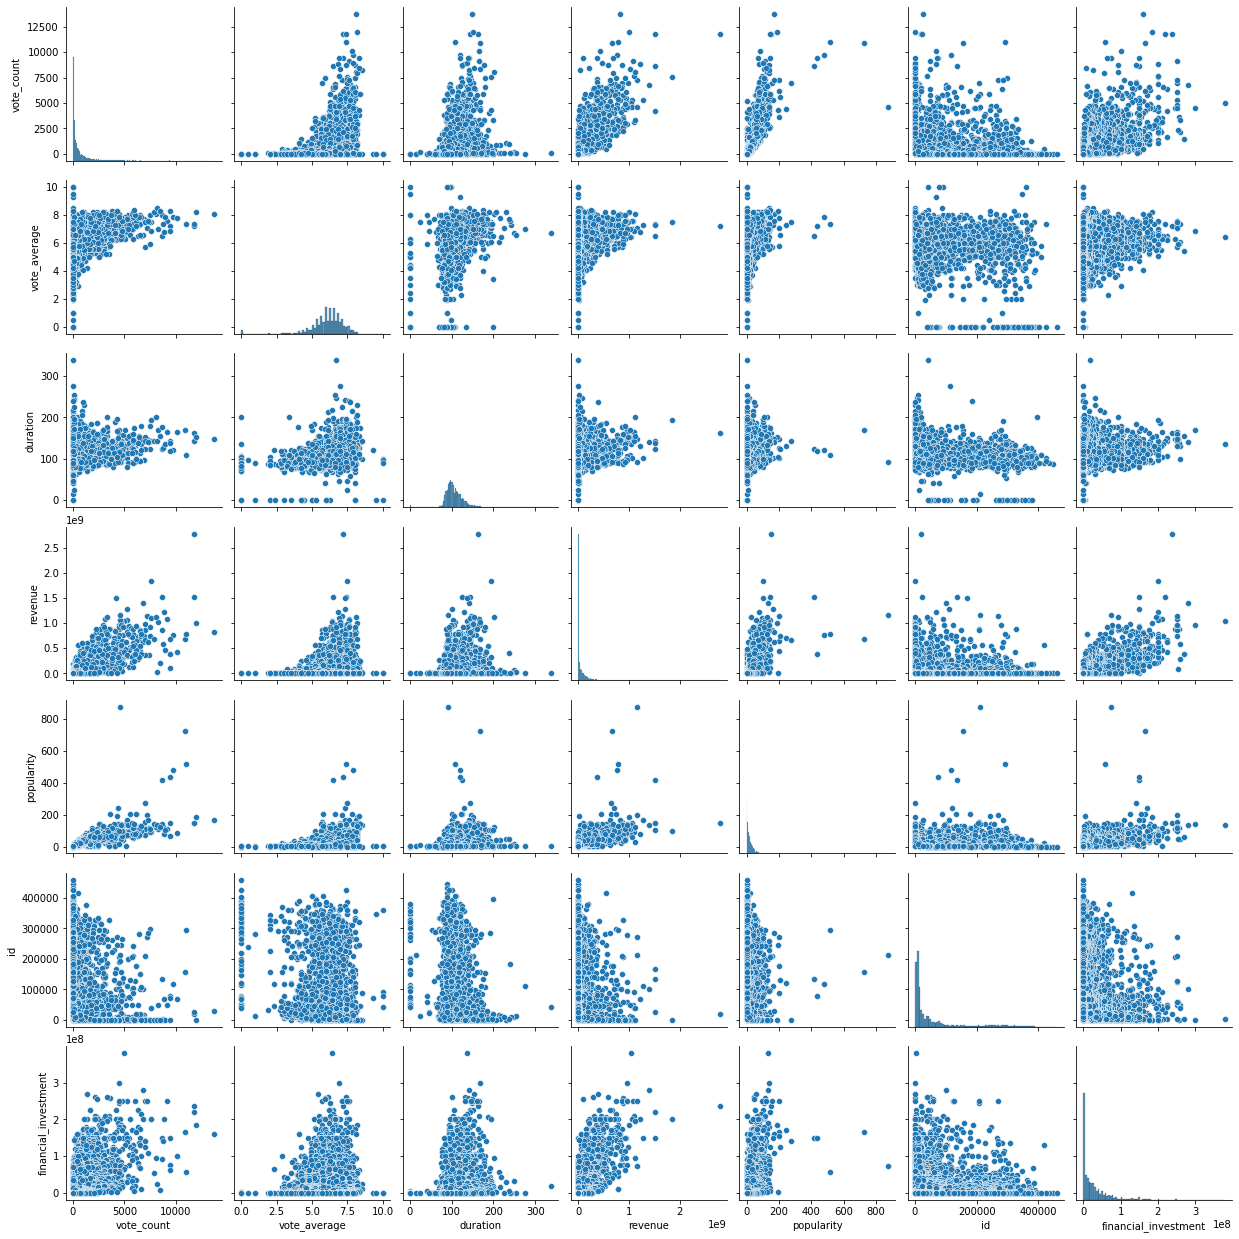

In [42]:
sns.pairplot(dataset_data)  
plt.show()

### Correlation analysis

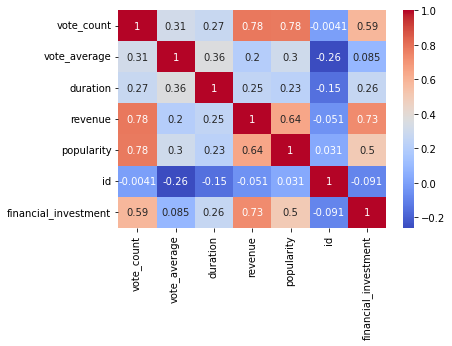

In [43]:
correlation_matrix = dataset_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Analysis of the importance of different characteristics

In [49]:
feature_importance = correlation_matrix['revenue'].sort_values(ascending=False)
print(feature_importance)

revenue                 1.000000
vote_count              0.781699
financial_investment    0.725570
popularity              0.643847
duration                0.251226
vote_average            0.199615
id                     -0.050635
Name: revenue, dtype: float64


## Feature Selection and Creation

In [50]:
dataset_data.columns

Index(['vote_count', 'vote_average', 'duration', 'revenue', 'release',
       'countries_of_production', 'popularity', 'original_language',
       'keywords', 'id', 'genres', 'financial_investment'],
      dtype='object')

In [53]:
dataset_data.drop(columns=['title','tagline','status','spoken_languages','production','overview','original_title','original_language','homepage'],inplace=True) #not important for the revenue
dataset_data.head()

,vote_count,vote_average,duration,revenue,release,countries_of_production,popularity,keywords,id,genres,financial_investment
0,11800,7.2,162.0,2.787965e+09,2009-12-10,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",150.437577,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000.0
1,4500,6.9,169.0,9.610000e+08,2007-05-19,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",139.082615,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000.0
2,4466,6.3,148.0,8.806746e+08,2015-10-26,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",107.376788,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000.0
3,9106,7.6,165.0,1.084939e+09,2012-07-16,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",112.312950,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000.0
4,2124,6.1,132.0,2.841391e+08,2012-03-07,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",43.926995,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000.0


In [54]:
dataset_data.isnull().sum() #check the missing values

vote_count                   0
vote_average               480
duration                     2
revenue                     48
release                      1
countries_of_production      0
popularity                   0
keywords                     0
id                           0
genres                       0
financial_investment       384
dtype: int64

In [55]:
movie_id_missing_duration = dataset_data[dataset_data['duration'].isnull()]['id'].values #find the movies with no value
print(movie_id_missing_duration)

[370980 459488]


In [56]:
dataset_data.loc[dataset_data['id'] == 370980, 'duration'] = 113.0 #value found on ethernet
dataset_data.loc[dataset_data['id'] == 459488, 'duration'] = 81.0 #value found on ethernet

dataset_data.isnull().sum()
dataset_data['duration'].head()

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: duration, dtype: float64

In [57]:
movie_id_missing_release = dataset_data[dataset_data['release'].isnull()]['id'].values[0] #find the value with no value
print(movie_id_missing_release)

380097


In [58]:
dataset_data['release'] = dataset_data['release'].fillna('2022-06-10') #value find on ethernet
dataset_data['release'] = pd.to_datetime(dataset_data['release'])

dataset_data.isnull().sum()

vote_count                   0
vote_average               480
duration                     0
revenue                     48
release                      0
countries_of_production      0
popularity                   0
keywords                     0
id                           0
genres                       0
financial_investment       384
dtype: int64

In [59]:
dataset_data['vote_average'].fillna(dataset_data['vote_average'].mean(), inplace=True) #all missing value are remplaced by the mean of the other values
dataset_data['revenue'].fillna(dataset_data['revenue'].mean(), inplace=True)#all missing value are remplaced by the mean of the other values
dataset_data['financial_investment'].fillna(dataset_data['financial_investment'].mean(), inplace=True)#all missing value are remplaced by the mean of the other values

dataset_data.isna().sum()

vote_count                 0
vote_average               0
duration                   0
revenue                    0
release                    0
countries_of_production    0
popularity                 0
keywords                   0
id                         0
genres                     0
financial_investment       0
dtype: int64

In [81]:
selected_features = ['vote_count','vote_average','duration','popularity','financial_investment'] 
X = dataset_data[selected_features]
y = dataset_data['revenue']

## Data Pre-processing

### Encode categorical variables and handle any categorical data imbalances

In [82]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['vote_count','vote_average','duration','popularity','financial_investment']),
])

### Split the dataset into training, validation, and test sets

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Comparison and Hyperparameter selection

### Define the models to be compared

In [84]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

### Compare model performance

In [85]:
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f'{name}:')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R^2: {r2_score(y_test, y_pred)}')
    print('')

Linear Regression:
MAE: 47950967.031829976
RMSE: 85301222.36406015
R^2: 0.719919290155151

Decision Tree:
MAE: 54692478.00800056
RMSE: 122115468.08501218
R^2: 0.4259971533613842

Random Forest:
MAE: 44923750.14324345
RMSE: 86274383.69727148
R^2: 0.7134922194820656



### Selection of hyperparameters for the selected model

In [87]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(estimator=Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor())]),
                           param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'model__max_depth': 10, 'model__n_estimators': 100}


## Model Evaluation and Interpretation

### Evaluate the final model on the test set to assess its generalization performance


In [88]:
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
print(f'Final Model Performance:')
print(f'MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}')
print(f'R^2: {r2_score(y_test, y_test_pred)}')

Final Model Performance:
MAE: 43691391.00811199
RMSE: 85562565.38378519
R^2: 0.7182004573902052
